In [36]:
import cv2
import numpy as np
import subprocess
import os

### Download model

In [ ]:
model_cfg = "yolov3.cfg"
model_weights = "yolov3.weights"

if not os.path.isfile(model_cfg):
    subprocess.call(['wget', 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'])

if not os.path.isfile(model_weights):
    subprocess.call(['wget', 'https://pjreddie.com/media/files/yolov3.weight'])

### Load YOLOv3 model

In [37]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

### Load classes

In [38]:
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

### Set input and output layers

In [39]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
input_size = (416, 416)

### Load image

In [40]:
img = cv2.imread("image.jpg")

### Preprocess image

In [41]:
blob = cv2.dnn.blobFromImage(img, 1/255.0, input_size, swapRB=True, crop=False)

### Set input

In [42]:
net.setInput(blob)

### Forward pass

In [43]:
outs = net.forward(output_layers)

### Postprocess detections

In [44]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])
            x = center_x - w // 2
            y = center_y - h // 2
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, classes[class_id], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

### Show image

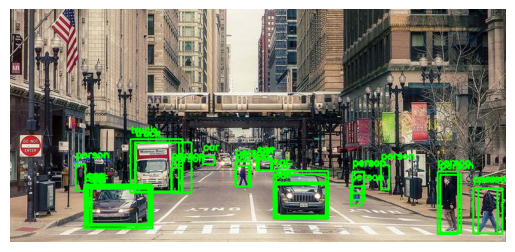

In [45]:
from l_utils import plt_show_bgr

plt_show_bgr(img)